# DiploDatos 2019 - Análisis y Visualización
En este práctico se propone explorar un dataset que contiene información de varias agencias de correo de Brasil, con el objetivo de extraer toda la información relevante sobre estos datos y presentarla de manera organizada y sencilla.
En estos datos vamos a encontrar información geográfica de los compradores y vendedores, el tipo de servicio por el que viajan los paquetes, el estado del paquete, algunas fechas relevantes y la cantidad de días hábiles que tardó el envío en llegar a su destino (target).

## Definiciones

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

cols = ['service',
        'sender_zipcode',
        'receiver_zipcode',
        'sender_state',
        'receiver_state',
        'shipment_type',
        'quantity',
        'status',
        'date_created',
        'date_sent',
        'date_visit',
        'target']
cols_holidays = ['holiday', 
                 'description']
data_path = './shipments_BR_201903.csv'
holidays = './holidays.csv'

### Datos
Los datos que vamos a cargar son un sample no uniforme que corresponde al mes de Marzo de 2019.

In [2]:
df = pd.read_csv(data_path, usecols=cols)
df.shape

(1000000, 12)

In [3]:
df.head()

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
0,SP,3005,SP,5409,express,1,0,done,2019-03-04 00:00:00,2019-03-05 13:24:00,2019-03-07 18:01:00,2
1,SP,17052,MG,37750,standard,1,1,done,2019-03-19 00:00:00,2019-03-20 14:44:00,2019-03-27 10:21:00,5
2,SP,2033,SP,11040,express,1,0,done,2019-02-18 00:00:00,2019-02-21 15:08:00,2019-02-28 18:19:00,5
3,SP,13900,SP,18500,express,1,0,done,2019-03-09 00:00:00,2019-03-11 15:48:00,2019-03-12 13:33:00,1
4,SP,4361,RS,96810,express,1,0,done,2019-03-08 00:00:00,2019-03-12 08:19:00,2019-03-16 08:24:00,4


#### Referencia de las columnas
* **service**: Identificador unico que corresponde a un tipo de servicio de un correo en particular.
* **sender_zipcode:** Código postal de quien envía el paquete (usualmente el vendedor).
* **receiver_zipcode:** Código postal de quien recibe el paquete (usualmente el comprador).
* **sender_state:** Nombre abreviado del estado de quien envía el paquete.
* **receiver_state:** Nombre abreviado del estado de quien recibe el paquete.
* **quantity:** Cantidad de items que tiene dentro el paquete.
* **status:** Estado final del envío.
* **date_created:** Fecha de compra de el o los items.
* **date_sent:** Fecha en que el correo recibe el paquete.
* **date_visit:** Fecha en que el correo entrega el paquete.
* **target:** Cantidad de dias hábiles que tardó el correo en entregar el paquete desde que lo recibe.


#### Feriados

In [3]:
df_h = pd.read_csv(holidays, usecols=cols_holidays)
df_h.shape

(26, 2)

In [5]:
df_h.sample(5)

,holiday,description
15,2018-12-31,Ano Novo
14,2019-03-07,Dia da Mulher
17,2019-05-30,Corpus Christi
23,2019-12-23,Noche buena
6,2019-04-20,Aniversário de Brasília


# Información general

Cantidad y proporción de envíos, servicios, tipos de envíos y rutas(consideramos como ruta la tripla zipcode, zipcode, servicio).

Envios

El número de filas es el número de envíos, sacar la mayor cantidad de info que podamos, la proporción es por 6 meses ver por 1mes

Servicios

In [6]:
df['service'].value_counts()

1     501509
0     321839
4      58517
2      49185
3      22057
5      20116
6      17602
8       5288
9       3224
7        528
10       134
11         1
Name: service, dtype: int64

In [7]:
df['service'].value_counts(normalize=True)

1     0.501509
0     0.321839
4     0.058517
2     0.049185
3     0.022057
5     0.020116
6     0.017602
8     0.005288
9     0.003224
7     0.000528
10    0.000134
11    0.000001
Name: service, dtype: float64

Tipos de envíos

In [8]:
df['shipment_type'].value_counts()

standard    593467
express     394600
super        11933
Name: shipment_type, dtype: int64

In [9]:
df['shipment_type'].value_counts(normalize=True)

standard    0.593467
express     0.394600
super       0.011933
Name: shipment_type, dtype: float64

Rutas

In [7]:
df['ruta']=df['sender_zipcode'].astype('str')+'-'+df['receiver_zipcode'].astype('str')+'-'+df['service'].astype('str')

In [8]:
df['ruta'].value_counts()

6422-28943-0     69
6422-95095-0     56
5206-5203-0      51
37165-37165-0    41
3728-3727-0      35
9260-9280-0      32
2523-2523-0      29
9520-9520-0      29
6422-16015-0     29
14940-14940-0    28
9195-9606-0      28
14402-14403-0    26
1207-1207-0      24
6422-17050-0     24
13290-13212-6    23
6422-26510-0     21
6422-7092-0      21
6422-49160-0     20
13290-35162-6    20
14400-14400-0    20
6422-87370-0     20
14401-14401-0    20
6422-41650-0     20
13290-38400-6    19
13290-39400-6    18
13290-13481-6    17
13290-13214-6    17
6422-45602-0     17
13290-33200-6    17
1033-6854-0      17
                 ..
29146-13412-1     1
8341-89620-1      1
47700-39680-1     1
7085-1320-5       1
9710-30350-0      1
8542-35010-1      1
13465-5842-0      1
6326-3401-0       1
79009-1251-1      1
28620-39350-1     1
20541-9403-1      1
2415-70376-1      1
3441-13920-0      1
1029-32240-0      1
11050-31615-1     1
8740-2832-5       1
29580-85568-1     1
30710-2230-0      1
13880-90250-0     1


In [9]:
df['ruta'].value_counts(normalize=True)

6422-28943-0     0.000069
6422-95095-0     0.000056
5206-5203-0      0.000051
37165-37165-0    0.000041
3728-3727-0      0.000035
9260-9280-0      0.000032
2523-2523-0      0.000029
9520-9520-0      0.000029
6422-16015-0     0.000029
14940-14940-0    0.000028
9195-9606-0      0.000028
14402-14403-0    0.000026
1207-1207-0      0.000024
6422-17050-0     0.000024
13290-13212-6    0.000023
6422-26510-0     0.000021
6422-7092-0      0.000021
6422-49160-0     0.000020
13290-35162-6    0.000020
14400-14400-0    0.000020
6422-87370-0     0.000020
14401-14401-0    0.000020
6422-41650-0     0.000020
13290-38400-6    0.000019
13290-39400-6    0.000018
13290-13481-6    0.000017
13290-13214-6    0.000017
6422-45602-0     0.000017
13290-33200-6    0.000017
1033-6854-0      0.000017
                   ...   
29146-13412-1    0.000001
8341-89620-1     0.000001
47700-39680-1    0.000001
7085-1320-5      0.000001
9710-30350-0     0.000001
8542-35010-1     0.000001
13465-5842-0     0.000001
6326-3401-0 

Puntos máximos y mínimos de cada feature

In [13]:
df.max()

sender_state                         TO
sender_zipcode                    99990
receiver_state                       TO
receiver_zipcode                  99990
shipment_type                     super
quantity                              5
service                              11
status                             sent
date_created        2019-06-28 00:00:00
date_sent           2019-03-29 07:06:00
date_visit          2019-03-29 23:31:00
target                              118
ruta                      99990-44790-1
dtype: object

In [14]:
df.min()

sender_state                         AC
sender_zipcode                     1001
receiver_state                       AC
receiver_zipcode                   1001
shipment_type                   express
quantity                              1
service                               0
status                        cancelled
date_created        2018-09-26 00:00:00
date_sent           2018-10-01 16:55:00
date_visit          2019-02-28 00:03:00
target                                0
ruta                       1001-11065-0
dtype: object

Calcular estadísticos como la media, mediana, desviación estándar y percentiles del
target

In [15]:
df['target'].describe()

count    1000000.000000
mean           6.021577
std            5.157973
min            0.000000
25%            2.000000
50%            4.000000
75%            9.000000
max          118.000000
Name: target, dtype: float64

La mediana:

In [16]:
(df['target'].max()-df['target'].min())/2

59.0

Graficar la distribución del target ¿Responde a alguna distribución conocida?

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

/home/isanti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


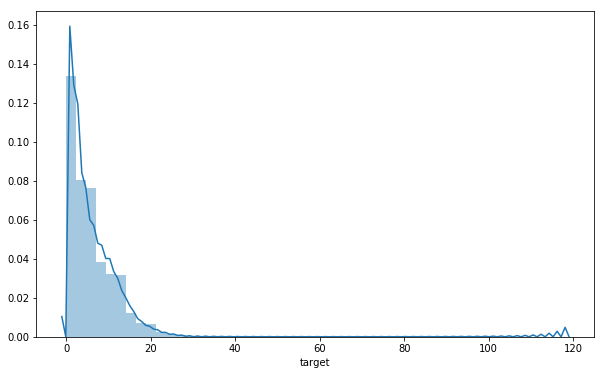

In [18]:
plt.figure(figsize=(10,6))
sb.distplot(df['target'])

Graficar solo la parte más informativa de la distribución del target, teniendo cuidado con elegir correctamente los parámetros de los gráficos, como la cantidad de bins en un histograma.

(array([1.80655e+05, 1.35145e+05, 1.07500e+05, 8.22500e+04, 6.87900e+04,
        1.11092e+05, 4.79370e+04, 4.23760e+04, 4.04610e+04, 3.58210e+04,
        3.02150e+04, 4.49210e+04, 1.62410e+04, 1.21330e+04, 9.72400e+03,
        7.34000e+03, 1.09140e+04, 4.01400e+03, 3.00800e+03, 2.30000e+03,
        1.76600e+03, 1.33400e+03, 1.78200e+03, 5.04000e+02, 3.70000e+02,
        2.33000e+02, 2.19000e+02, 2.97000e+02, 1.17000e+02, 9.40000e+01,
        7.10000e+01, 6.20000e+01, 5.90000e+01, 8.10000e+01, 1.70000e+01,
        1.80000e+01, 1.60000e+01, 2.20000e+01, 2.00000e+01, 1.10000e+01,
        1.30000e+01, 7.00000e+00, 3.00000e+00, 2.00000e+00, 8.00000e+00,
        5.00000e+00, 7.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00

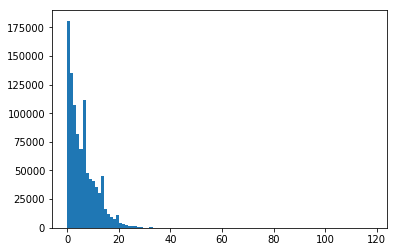

In [ ]:
plt.hist(df['target'],bins=100)

In [ ]:
a=df[df['target']<40]

In [ ]:
plt.figure(figsize=(10,6))
sb.distplot(a)

Identificar y graficar outliers

In [19]:
df['target'].quantile(np.arange(0.0,1.1,0.1))

0.0      0.0
0.1      1.0
0.2      2.0
0.3      2.0
0.4      3.0
0.5      4.0
0.6      6.0
0.7      8.0
0.8     10.0
0.9     13.0
1.0    118.0
Name: target, dtype: float64

In [18]:
df['target'].quantile(np.arange(0.90,1.01,0.01))

0.90     13.0
0.91     14.0
0.92     14.0
0.93     15.0
0.94     15.0
0.95     16.0
0.96     17.0
0.97     18.0
0.98     20.0
0.99     22.0
1.00    118.0
Name: target, dtype: float64

Acá podemos ver que el 99% de los datos tienen un valor menor  que 22 es decir, que los valores mayores a 22 no son representativos de la muestra. 
#####no se a que se refiere con graficar los outliers

¿Los fines de semana son diferentes a los dias de semana? ¿En que sentido?

##### Acá esta lo que intente hacer de este inciso en realidad quería separar los días de fin de semana del resto de los días pero no encontre como hacer para distinguirlo si hay una librería para eso o como...no me salió

In [11]:
import datetime as dt

In [13]:
df['date_created']=pd.to_datetime(df['date_created'])

In [24]:
df['dn_date_created']=df['date_created'].apply(lambda x: x.day_name())

In [26]:
df['date_sent']=pd.to_datetime(df['date_sent'])
df['dn_date_sent']=df['date_sent'].apply(lambda x: x.day_name())
df['date_visit']=pd.to_datetime(df['date_visit'])
df['dn_date_visit']=df['date_visit'].apply(lambda x: x.day_name())

Con el to_datetime transformamos la columna en datos del tipo time y con el appply a acada dato del tiempo le aplico day_name

date_created

In [28]:
df['dn_date_created'].value_counts()

Tuesday      173153
Wednesday    164127
Monday       162587
Thursday     155649
Friday       133823
Sunday       106375
Saturday     104286
Name: dn_date_created, dtype: int64

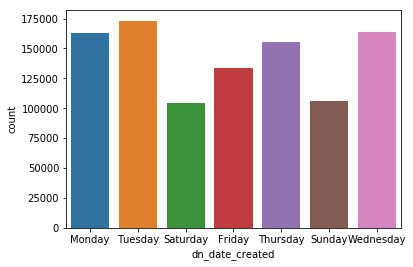

In [31]:
sb.countplot(df['dn_date_created'])

 En este gráfico de barras podemos ver la cantidad de pedidos que se realizan por día. podemos observar también que el día en que más compras se realizan es el día Martes y en segundo lugar los días miércoles

date_sent

In [47]:
df['dn_date_sent'].value_counts()

Monday       226608
Tuesday      201105
Wednesday    198988
Thursday     172596
Friday       166019
Saturday      32629
Sunday         2055
Name: dn_date_sent, dtype: int64

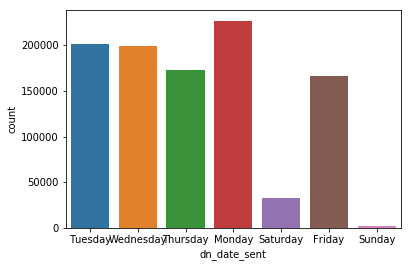

In [48]:
sb.countplot(df['dn_date_sent'])

Aquí podemos ver los envíos por día, y observar que la mayoría se realizan los días Lunes mientras que una minoría se realizan los Domingos

In [49]:
df['dn_date_visit'].value_counts()

Thursday     222291
Monday       186650
Tuesday      180087
Wednesday    177875
Friday       173354
Saturday      42280
Sunday        17463
Name: dn_date_visit, dtype: int64

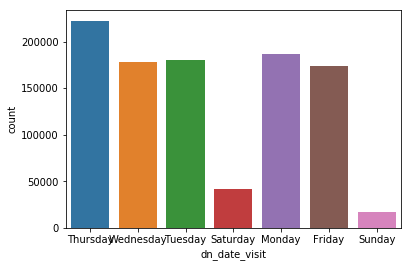

In [50]:
sb.countplot(df['dn_date_visit'])

Como podemos observar el correo entrega sus paquetes mayormente en los días Jueves, mientras que una gran minoría de las entregas suceden los días Domingos

*¿Existe algún periodo de tiempo diferente a los demás? Comparar gráficamente las distribuciones de los targets (Puede ayudar utilizar información externa).

In [37]:
df_h.dtypes

holiday        object
description    object
dtype: object

In [43]:
df['date_created'].isin(pd.to_datetime(df_h['holiday'])).value_counts()

False    946290
True      53710
Name: date_created, dtype: int64

In [45]:
print(df['date_sent'].isin(pd.to_datetime(df_h['holiday'])).value_counts())
print(df['date_visit'].isin(pd.to_datetime(df_h['holiday'])).value_counts())

False    1000000
Name: date_sent, dtype: int64
False    999999
True          1
Name: date_visit, dtype: int64


### comienzo de nuevo 

In [4]:
df_1=df.copy()

### servicios

*Graficar solo la parte más informativa de la distribución del ​ target​ para los 4 servicios más representados, con los cuidados correspondientes.

In [6]:
df_1

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
0,SP,3005,SP,5409,express,1,0,done,2019-03-04 00:00:00,2019-03-05 13:24:00,2019-03-07 18:01:00,2
1,SP,17052,MG,37750,standard,1,1,done,2019-03-19 00:00:00,2019-03-20 14:44:00,2019-03-27 10:21:00,5
2,SP,2033,SP,11040,express,1,0,done,2019-02-18 00:00:00,2019-02-21 15:08:00,2019-02-28 18:19:00,5
3,SP,13900,SP,18500,express,1,0,done,2019-03-09 00:00:00,2019-03-11 15:48:00,2019-03-12 13:33:00,1
4,SP,4361,RS,96810,express,1,0,done,2019-03-08 00:00:00,2019-03-12 08:19:00,2019-03-16 08:24:00,4
5,SP,15708,RJ,24230,standard,1,1,done,2019-03-01 00:00:00,2019-03-02 08:55:00,2019-03-18 14:28:00,9
6,ES,29060,RS,98700,standard,2,1,done,2019-03-07 00:00:00,2019-03-08 17:47:00,2019-03-25 14:01:00,11
7,SP,1202,RS,93230,standard,1,1,done,2019-02-16 00:00:00,2019-02-20 12:24:00,2019-03-12 10:11:00,13
8,SP,2313,SP,4165,express,2,0,done,2019-02-28 00:00:00,2019-03-01 14:35:00,2019-03-04 14:22:00,1
9,PR,80215,SP,7055,standard,1,1,done,2019-02-28 00:00:00,2019-03-04 16:04:00,2019-03-14 15:27:00,7


#### Referencia de las columnas
* **service**: Identificador unico que corresponde a un tipo de servicio de un correo en particular.
* **sender_zipcode:** Código postal de quien envía el paquete (usualmente el vendedor).
* **receiver_zipcode:** Código postal de quien recibe el paquete (usualmente el comprador).
* **sender_state:** Nombre abreviado del estado de quien envía el paquete.
* **receiver_state:** Nombre abreviado del estado de quien recibe el paquete.
* **quantity:** Cantidad de items que tiene dentro el paquete.
* **status:** Estado final del envío.
* **date_created:** Fecha de compra de el o los items.
* **date_sent:** Fecha en que el correo recibe el paquete.
* **date_visit:** Fecha en que el correo entrega el paquete.
* **target:** Cantidad de dias hábiles que tardó el correo en entregar el paquete desde que lo recibe.

In [8]:
df_1['service'].value_counts()

1     501509
0     321839
4      58517
2      49185
3      22057
5      20116
6      17602
8       5288
9       3224
7        528
10       134
11         1
Name: service, dtype: int64

Podemos observar con esto que los cuatro servicios mas representados son los cuatro primeros, los cuales representaré mediante un gráfico de barras que describe cuantas veces aparece el target.

In [9]:
df_serv= df_1[df_1['service'].isin([1, 0, 4, 2])]

In [10]:
df_serv

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
0,SP,3005,SP,5409,express,1,0,done,2019-03-04 00:00:00,2019-03-05 13:24:00,2019-03-07 18:01:00,2
1,SP,17052,MG,37750,standard,1,1,done,2019-03-19 00:00:00,2019-03-20 14:44:00,2019-03-27 10:21:00,5
2,SP,2033,SP,11040,express,1,0,done,2019-02-18 00:00:00,2019-02-21 15:08:00,2019-02-28 18:19:00,5
3,SP,13900,SP,18500,express,1,0,done,2019-03-09 00:00:00,2019-03-11 15:48:00,2019-03-12 13:33:00,1
4,SP,4361,RS,96810,express,1,0,done,2019-03-08 00:00:00,2019-03-12 08:19:00,2019-03-16 08:24:00,4
5,SP,15708,RJ,24230,standard,1,1,done,2019-03-01 00:00:00,2019-03-02 08:55:00,2019-03-18 14:28:00,9
6,ES,29060,RS,98700,standard,2,1,done,2019-03-07 00:00:00,2019-03-08 17:47:00,2019-03-25 14:01:00,11
7,SP,1202,RS,93230,standard,1,1,done,2019-02-16 00:00:00,2019-02-20 12:24:00,2019-03-12 10:11:00,13
8,SP,2313,SP,4165,express,2,0,done,2019-02-28 00:00:00,2019-03-01 14:35:00,2019-03-04 14:22:00,1
9,PR,80215,SP,7055,standard,1,1,done,2019-02-28 00:00:00,2019-03-04 16:04:00,2019-03-14 15:27:00,7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text xticklabel objects>)

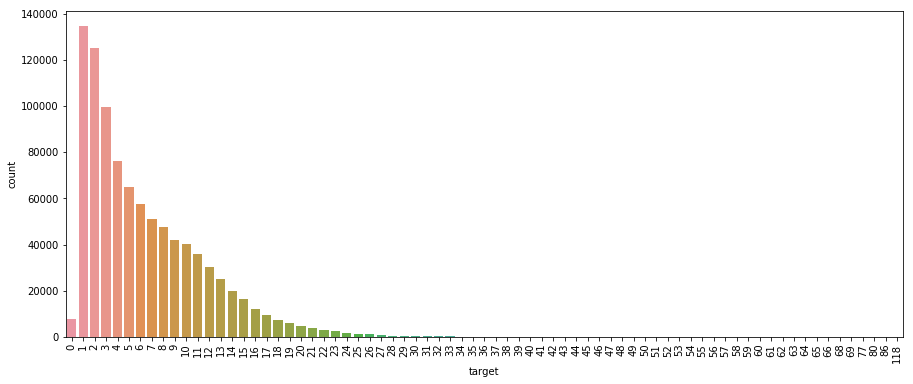

In [16]:
plt.figure(figsize=(15,6))
sb.countplot(df_serv['target'])
plt.xticks(rotation=90)

Busco representar sólo la parte más informativa de la distribución target

In [18]:
df_serv['target'].quantile(0.99)

23.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

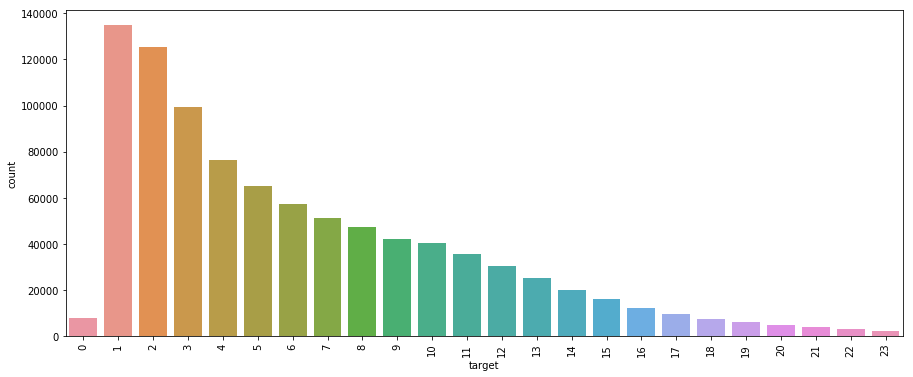

In [19]:
plt.figure(figsize=(15,6))
sb.countplot(df_serv[df_serv['target']<24]['target'])
plt.xticks(rotation=90)

*¿Existen servicios más rápidos que otros?

In [27]:
df_fast=df_1[df_1['target']<24].groupby(['service'],as_index=False).agg({'target':'mean'})

In [28]:
df_fast

,service,target
0,0,2.301487
1,1,9.129298
2,2,4.861787
3,3,3.861314
4,4,3.352907
5,5,0.577650
6,6,1.577955
7,7,6.297143
8,8,0.510212
9,9,1.233251


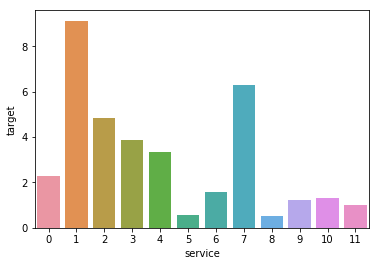

In [29]:
sb.barplot(data=df_fast, x='service', y='target')
               

En promedio podemos decir que si existen servicios que demoran más que otros en este caso se trata de las barras mas altas. Sin embargo, los servicios más pedidos son 1 (que corresponde a la barra más alta i.e. mayor demora), 0, 4, 2.

# Conclusion